# Data Analysis of Airbnb full listing in Riga, Latvia



```
# Preparing
```



In [2]:
import pandas as pd
from google.colab import drive
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import GeoJson
import os
from IPython.display import HTML
import geopandas as gpd
from datetime import datetime as dt
import math
from geopy.distance import great_circle

In [3]:
# Use fullListingsRiga.csv from files folder in Colab
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving fullListingsRiga.csv to fullListingsRiga (1).csv


Descriptive Data Analysis

In [4]:
# Display first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2801 non-null   int64  
 1   listing_url                                   2801 non-null   object 
 2   scrape_id                                     2801 non-null   int64  
 3   last_scraped                                  2801 non-null   object 
 4   source                                        2801 non-null   object 
 5   name                                          2801 non-null   object 
 6   description                                   2764 non-null   object 
 7   neighborhood_overview                         1467 non-null   object 
 8   picture_url                                   2801 non-null   object 
 9   host_id                                       2801 non-null   i

In [5]:
# Get basic information about the dataset
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21134,https://www.airbnb.com/rooms/21134,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.75 · 1 bedroom · 1 be...,Cozy room in a shared flat with to other peopl...,"The flat is in the urban, a bit bohemian centr...",https://a0.muscache.com/pictures/1850842/2a1b8...,80446,...,4.90,4.58,4.83,NaN,f,2,0,2,0,0.51
1,120480,https://www.airbnb.com/rooms/120480,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.58 · 2 bedrooms · 2 b...,"Apartment ""Magic of Riga History"" is ideal for...",NaN,https://a0.muscache.com/pictures/1858364/affbf...,606352,...,4.89,4.94,4.76,NaN,f,1,1,0,0,3.64
2,253753,https://www.airbnb.com/rooms/253753,20230629191658,2023-06-29,previous scrape,Rental unit in Riga · ★4.92 · 1 bedroom · 2 be...,"Fireplace, free WIFI, kitchen, TV, DVD,<br /><...",NaN,https://a0.muscache.com/pictures/2508228/f55e6...,1332828,...,4.94,4.89,4.89,NaN,f,1,1,0,0,0.87
3,260539,https://www.airbnb.com/rooms/260539,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.58 · 2 bedrooms · 5 b...,Cosy yet spacious 5th floor apartment in the c...,"Apartment is located in the centre, Old town i...",https://a0.muscache.com/pictures/miso/Hosting-...,1297653,...,4.78,4.44,4.68,NaN,f,2,2,0,0,0.34
4,275688,https://www.airbnb.com/rooms/275688,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.69 · 1 bedroom · 3 be...,Stylish cozy 1-bedroom apartment in renovated ...,"Apartment located in the heart of Old Riga, th...",https://a0.muscache.com/pictures/a664ffa0-5d7f...,1441076,...,4.75,4.88,4.44,NaN,t,9,9,0,0,0.13


In [6]:
# Show last 5 rows of the table
df.tail()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2796,922926550953532703,https://www.airbnb.com/rooms/922926550953532703,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 2 bed...,Cozy apartment perfecltley fits for 2 guests o...,Čiekurkalns from historic perspective is one o...,https://a0.muscache.com/pictures/miso/Hosting-...,1151222,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2797,922975522747392477,https://www.airbnb.com/rooms/922975522747392477,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,Šis plašais 2 istabu (73 kvm) dzīvoklis atroda...,City center,https://a0.muscache.com/pictures/miso/Hosting-...,197731812,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2798,923249540208009942,https://www.airbnb.com/rooms/923249540208009942,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,* EXCELLENT LOCATION Right in the heart of Rig...,Central location for a budget price<br /><br /...,https://a0.muscache.com/pictures/eaf562c1-9cf6...,16886983,...,NaN,NaN,NaN,NaN,t,14,3,11,0,NaN
2799,923711881300999876,https://www.airbnb.com/rooms/923711881300999876,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 2 bed...,Ceļojums bez liekām raizēm šajā mierīgajā cent...,Mājoklis ar savu īpašu auru Rīgas vēsturiskajā...,https://a0.muscache.com/pictures/miso/Hosting-...,30036013,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2800,923801442823596095,https://www.airbnb.com/rooms/923801442823596095,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 2 bedrooms · 2 be...,Это уникальное жилье подарит яркие воспоминания.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,522530181,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [7]:
# Tupel with number of rows and columns
df.shape

(2801, 75)

In [8]:
# Statistical summary of numeric columns
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.801000e+03,2.801000e+03,2.801000e+03,2800.000000,2800.000000,0.0,2801.000000,2801.000000,2801.000000,0.0,...,2357.000000,2358.000000,2358.000000,2358.000000,0.0,2801.000000,2801.000000,2801.000000,2801.000000,2367.000000
mean,2.978057e+17,2.023063e+13,1.747685e+08,12.435714,17.083929,NaN,56.954872,24.120898,3.719743,NaN,...,4.882630,4.884580,4.789483,4.761573,NaN,7.369154,6.639414,0.627633,0.083542,1.541103
std,3.822959e+17,0.000000e+00,1.607871e+08,79.016743,142.266052,NaN,0.019173,0.033045,2.312003,NaN,...,0.302063,0.297307,0.329849,0.364504,NaN,10.886530,10.829388,2.568951,0.637084,1.656814
min,2.113400e+04,2.023063e+13,2.530700e+04,1.000000,1.000000,NaN,56.867120,23.968780,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.786571e+07,2.023063e+13,2.776495e+07,1.000000,2.000000,NaN,56.948430,24.107910,2.000000,NaN,...,4.880000,4.880000,4.710000,4.710000,NaN,1.000000,1.000000,0.000000,0.000000,0.350000
50%,4.698688e+07,2.023063e+13,1.329634e+08,3.000000,4.000000,NaN,56.952260,24.122450,4.000000,NaN,...,4.960000,4.970000,4.890000,4.840000,NaN,3.000000,2.000000,0.000000,0.000000,0.970000
75%,7.201902e+17,2.023063e+13,2.842365e+08,10.000000,12.000000,NaN,56.958570,24.135940,4.000000,NaN,...,5.000000,5.000000,5.000000,4.950000,NaN,9.000000,8.000000,0.000000,0.000000,2.160000
max,9.238014e+17,2.023063e+13,5.225302e+08,1837.000000,3334.000000,NaN,57.080890,24.268480,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,61.000000,61.000000,20.000000,6.000000,10.300000


Preparing host_since for host_exp (host experience in years)

In [9]:
# Checking available data: host_since
df.host_since

0       2010-02-12
1       2011-05-20
2       2011-10-25
3       2011-10-16
4       2011-11-25
           ...    
2796    2011-09-13
2797    2018-06-24
2798    2014-06-17
2799    2015-03-26
2800    2023-06-28
Name: host_since, Length: 2801, dtype: object

In [10]:
# Lets change the datatype from object to datetime
df.host_since=pd.to_datetime(df.host_since)
df.host_since.dt.year

0       2010.0
1       2011.0
2       2011.0
3       2011.0
4       2011.0
         ...  
2796    2011.0
2797    2018.0
2798    2014.0
2799    2015.0
2800    2023.0
Name: host_since, Length: 2801, dtype: float64

In [73]:
# Create new column to verify number of years of experience
df['host_exp']=dt.today().year-df.host_since.dt.year
df['host_exp'].mean()

5.976785714285715

In [77]:
# Counting number of superhosts
is_superhost_true = df['host_is_superhost'] == 't'
count_true_values = is_superhost_true.sum()
count_true_values

1041

Cleaning and filtering datatable

In [12]:
# If a column has at least one missing value, the corresponding value in the Series will be True, otherwise it will be False.
print(df.isna().any())

# To count the number of True and False values in the series returned
print(df.isna().any().value_counts())

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
host_exp                                         True
Length: 76, dtype: bool
False    40
True     36
dtype: int64


In [13]:
# Checking for duplicates
print(df.duplicated())

# To count the number of True and False values in the series returned
print(df.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
2796    False
2797    False
2798    False
2799    False
2800    False
Length: 2801, dtype: bool
False    2801
dtype: int64


In [14]:
# Count missing values
missing_values = df.isnull().sum()
print(missing_values)

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               434
host_exp                                          1
Length: 76, dtype: int64


In [15]:
# Description of full listings of Riga InsideAirbnb
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_exp
count,2.801000e+03,2.801000e+03,2.801000e+03,2800.000000,2800.000000,0.0,2801.000000,2801.000000,2801.000000,0.0,...,2358.000000,2358.000000,2358.000000,0.0,2801.000000,2801.000000,2801.000000,2801.000000,2367.000000,2800.000000
mean,2.978057e+17,2.023063e+13,1.747685e+08,12.435714,17.083929,NaN,56.954872,24.120898,3.719743,NaN,...,4.884580,4.789483,4.761573,NaN,7.369154,6.639414,0.627633,0.083542,1.541103,5.976786
std,3.822959e+17,0.000000e+00,1.607871e+08,79.016743,142.266052,NaN,0.019173,0.033045,2.312003,NaN,...,0.297307,0.329849,0.364504,NaN,10.886530,10.829388,2.568951,0.637084,1.656814,3.075650
min,2.113400e+04,2.023063e+13,2.530700e+04,1.000000,1.000000,NaN,56.867120,23.968780,1.000000,NaN,...,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,2.786571e+07,2.023063e+13,2.776495e+07,1.000000,2.000000,NaN,56.948430,24.107910,2.000000,NaN,...,4.880000,4.710000,4.710000,NaN,1.000000,1.000000,0.000000,0.000000,0.350000,4.000000
50%,4.698688e+07,2.023063e+13,1.329634e+08,3.000000,4.000000,NaN,56.952260,24.122450,4.000000,NaN,...,4.970000,4.890000,4.840000,NaN,3.000000,2.000000,0.000000,0.000000,0.970000,6.000000
75%,7.201902e+17,2.023063e+13,2.842365e+08,10.000000,12.000000,NaN,56.958570,24.135940,4.000000,NaN,...,5.000000,5.000000,4.950000,NaN,9.000000,8.000000,0.000000,0.000000,2.160000,8.000000
max,9.238014e+17,2.023063e+13,5.225302e+08,1837.000000,3334.000000,NaN,57.080890,24.268480,16.000000,NaN,...,5.000000,5.000000,5.000000,NaN,61.000000,61.000000,20.000000,6.000000,10.300000,14.000000


In [63]:
# check price column
df['price']
df['price'].isna().sum()
df['price'].dtype

dtype('O')

In [64]:
df['price'].isna().sum()

0

In [65]:
df['price'].dtype

dtype('O')

In [17]:
# delete dollar type and change the dtype from object to float
# create a copy of the dataset
df_clean = df.copy()
df_clean['price'] = df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-17-cfe1da2bdd89>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['price'] = df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [18]:
# Checking columns of df_clean
df_clean.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [19]:
# check price column for df_riga_clean
print(df_clean['price'])
print(df_clean['price'].isna().sum())
print(df_clean['price'].dtype)

0       10.0
1       56.0
2       58.0
3       80.0
4       75.0
        ... 
2796    96.0
2797    85.0
2798    41.0
2799    56.0
2800    64.0
Name: price, Length: 2801, dtype: float64
0
float64


In [20]:
# check if amenities has wifi
df_clean['has_wifi'] = df_clean['amenities'].str.contains('wifi', case=False)
df_clean['has_wifi']

0        True
1        True
2        True
3        True
4        True
        ...  
2796    False
2797    False
2798     True
2799    False
2800     True
Name: has_wifi, Length: 2801, dtype: bool

In [21]:
# filtering df for
# a) accommodates lower equal than 2
# b) has wifi is true
# c) number of reviews is larger than 0
filtered_df = (
    df_clean
    .query('accommodates <= 2')
    .query("has_wifi == True")
    .query("number_of_reviews > 0")
    # .dropna(subset='number_of_reviews')
)

In [59]:
len(filtered_df)

890

In [22]:
# Checking prices
average_price = filtered_df['price'].mean()
print(f"The average price of an Airbnb listing in the dataset is ${average_price:.2f}")

highest_price = filtered_df['price'].max()
print(f"The highest price of an Airbnb listing in the dataset is ${highest_price}")

# Get the index of the row with the highest price
index_of_max_price = filtered_df['price'].idxmax()

# Retrieve the row using the index
row_with_max_price = filtered_df.loc[index_of_max_price]

# Print the row
print(row_with_max_price)

#----- price higher 1000 per night
# Filter rows where price is greater than 1000
rows_with_price_above_1000 = filtered_df[filtered_df['price'] > 1000]

# Print the rows
print(rows_with_price_above_1000)
# Print the rows along with their prices
print(rows_with_price_above_1000[['price']])

#---- drop the high price row 65k
# Find the indices of rows where price is greater than 2000
indices_to_remove = filtered_df[filtered_df['price'] > 2000].index

# Drop those rows from the DataFrame
filtered_df.drop(indices_to_remove, inplace=True)

The average price of an Airbnb listing in the dataset is $54.03
The highest price of an Airbnb listing in the dataset is $1000.0
id                                                                           19065190
listing_url                                     https://www.airbnb.com/rooms/19065190
scrape_id                                                              20230629191658
last_scraped                                                               2023-06-29
source                                                                previous scrape
                                                                ...                  
calculated_host_listings_count_private_rooms                                        1
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                0.25
host_exp                                                                          6.0
has_wifi   

In [23]:
# Checking amenities
column_type = filtered_df['amenities'].dtype
print(f"Data type of 'amenities': {column_type}")

sample_entry = filtered_df['amenities'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'amenities': {sample_entry}")

Data type of 'amenities': object
Sample entry from 'amenities': ["City skyline view", "Indoor fireplace", "Bed linens", "Drying rack for clothing", "Kitchen", "Heating", "Wifi", "Dryer", "Refrigerator", "Dining table", "Essentials", "Room-darkening shades", "Courtyard view", "Bathtub", "Washer", "Dishes and silverware", "Hot water", "Hangers", "Iron"]


In [24]:
# Count the number of times 'wifi' or 'Wifi' appears in the 'amenities' column
wifi_count = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
print(f"'Wifi' or 'wifi' appears in {wifi_count} rows.")

'Wifi' or 'wifi' appears in 890 rows.


In [25]:
# Checking reviews
column_type = filtered_df['review_scores_value'].dtype
print(f"Data type of 'review_scores_value': {column_type}")

sample_entry = filtered_df['review_scores_rating'].iloc[0]  # This gets the first entry, but you can choose any index
print(f"Sample entry from 'review_scores_value': {sample_entry}")

average_score = filtered_df['review_scores_rating'].mean()
print(f"The average review score rating in the dataset is {average_score:.2f}")

# Check if there are missing values in the 'review_scores_value' column
missing_values = filtered_df['review_scores_value'].isna().sum()

if missing_values > 0:
    print(f"There are {missing_values} missing values in the 'review_scores_value' column.")
else:
    print("There are no missing values in the 'review_scores_value' column.")

Data type of 'review_scores_value': float64
Sample entry from 'review_scores_value': 4.75
The average review score rating in the dataset is 4.77
There are 2 missing values in the 'review_scores_value' column.


# Distance to CoWorking Spaces

In [26]:
# Upload modified_coordinates.csv from files folder in Colab
uploadedCoordinates = files.upload()
cwp = gpd.read_file(next(iter(uploadedCoordinates)))

Saving modified_coordinates.csv to modified_coordinates (1).csv


In [27]:
# Just checking a sample of 5 rows
cwp.sample(5)

,city,name,adress,Google Plus-Code,longitude,latitude,geometry
87,Lisbon,Workup - Lisbon Cowork Centre & Virtual Offices,"R. Tomás da Fonseca 40A, 1600-275 Lisboa, Port...","QR4M+55 Lissabon, Portugal",3875536,-916707,None
187,Barcelona,"Spaces - Barcelona, Spaces 22 Arroba Mar","Mapfre Tower, Carrer de la Marina, 16-18, 27th...","95QX+42 Barcelona, Spanien",4138779,2197560,None
107,Barcelona,"betahaus I - Coworking in Barcelona, Gràcia","Carrer de Vilafranca, 7, 08024 Barcelona, Spanien","C544+QP Barcelona, Spanien",4140696,2156778,None
179,Barcelona,GWC Coworking Barcelona,"Passeig d'Amunt, 7, Bajos, 08024 Barcelona, Sp...","C555+WQ Barcelona, Spanien",4140984,2159378,None
19,Lisbon,FLWR beauty co-working,"R. Jaime Batalha Reis 1d, 1500-679 Lisboa, Por...","PRV2+C2 Lissabon, Portugal",3874359,-919997,None


In [28]:
# Filter cwp for Riga and rename as cwp_riga
# Drop useless columns
# Set index with name column
cwp_riga=cwp[cwp.city=='Riga'].drop(['city', 'Google Plus-Code', 'adress'], axis=1).set_index('name')

In [29]:
cwp_riga

,longitude,latitude,geometry
name,,,
TechHub Riga,5694995,2412161,None
Mill Riga,5696434,2413481,None
Workland Telegraph,5694708,2411300,None
Coworking Riga,5696124,2413547,None
Techhub Riga,5694996,2412167,None
OraculeTang Space,5694931,2410388,None
Double9 coworking,5696509,2413011,None
DarbaVieta,5696341,2410390,None
croworking,5695736,2414741,None


In [58]:
# Number of CoworkingSpaces in Riga
len(cwp_riga)

17

In [30]:
# Converting long & lat in cwp_riga to floats
cwp_riga['longitude'] = cwp_riga['longitude'].astype(float)
cwp_riga['latitude'] = cwp_riga['latitude'].astype(float)

In [31]:
# Adjust longitude and latitude in valid format
cwp_riga.longitude=cwp_riga.longitude/100000
cwp_riga.latitude=cwp_riga.latitude/100000

In [32]:
# Create a dictionnary dict_cwp for easy iteration
dict_cwp={cwp_riga.index.tolist()[i] :(cwp_riga['longitude'].tolist()[i],cwp_riga['latitude'].tolist()[i]) for i in range(len(cwp_riga.index.tolist()))}
dict_cwp

{'TechHub Riga': (56.94995, 24.12161),
 'Mill Riga': (56.96434, 24.13481),
 'Workland Telegraph': (56.94708, 24.113),
 'Coworking Riga': (56.96124, 24.13547),
 'Techhub Riga': (56.94996, 24.12167),
 'OraculeTang Space': (56.94931, 24.10388),
 'Double9 coworking': (56.96509, 24.13011),
 'DarbaVieta': (56.96341, 24.1039),
 'croworking': (56.95736, 24.14741),
 'LU Student Business Inkubator Co-Working Space': (56.94779, 24.1151),
 'Regus - Riga, Terbatas': (56.95367, 24.1215),
 'Regus - Riga, Esplanade': (56.95589, 24.11854),
 'Beauty Works coworking': (56.95654, 24.13409),
 'Regus - Riga Opera': (56.94998, 24.11212),
 'Magnēts Coworking': (56.93581, 24.06924),
 'Hamann Coworking': (56.95055, 24.06517),
 'Teikums': (56.97692, 24.16626)}

In [33]:
# First function to prepare ditance to CoworkingSpaces
def distance(origin, destination):
    """
    Calculate the Haversine distance used for calculation between our dataset entries and coworking places.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [34]:
# Second funtion to prepare distances to CoworkingSpaces
def get_minimal_distance_from_coworking_place(l,L):
    """
    Get the minimal distance from co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv
    l for longitude
    L for latitude
    Result in km rounded with 3 digits
    """
    origin=(l,L)
    min_dist=""
    for cwp in dict_cwp:
        if min_dist=="":
            min_dist=distance(origin, dict_cwp[cwp])
            continue
        if min_dist<distance(origin, dict_cwp[cwp]):
            continue
        else:
            min_dist=distance(origin, dict_cwp[cwp])
    return round(min_dist,3)

In [35]:
# Third function to prepare distances to CoworkingSpaces
def get_number_of_coworking_place_less_than_n_km(l,L,n):
    """
    Get the number of co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv'
    within a radius of n kilometers
    l for longitude
    L for latitude
    n : float : lenght of radius within to check the number of co-working place
    Result is integer
    """
    origin=(l,L)
    count=0
    for cwp in dict_cwp:
        if distance(origin, dict_cwp[cwp])<=n:
            count+=1
    return count

In [36]:
#  Find the distance between each listing to the nearest cwp
filtered_df['distance']=filtered_df.apply(lambda x: get_minimal_distance_from_coworking_place(x.latitude,x.longitude), axis=1)
filtered_df['distance']

0       0.440
5       4.704
9       0.072
15      1.142
19      0.466
        ...  
2723    0.608
2734    0.594
2735    0.968
2742    0.978
2745    0.309
Name: distance, Length: 890, dtype: float64

In [70]:
# Average distance to CoworkingSpaces
filtered_df['distance'].mean()

0.7424449438202247

# Score of Attractiveness

The score of attractiveness combines scores of prices, host experience and reviews.

**Methodology of scoring:**

We build a scoring this columns: price, df.host_exp, reviews_scores_rating, distance.

The scoring is based on quantiles, i.e.
Price: low quantile = high score / high quantile = low score
Host_Experience: low quantile = low score / high quantile = high score
Reviews: low quantile = low score / high quantile = high score
Distances to CoWorkingSpaces: low quantile = high score / high quantile = low score

Weight:
Price 0.5;
Reviews 0.25;
Distance 0.15;
Host Experience 0.1;


In [37]:
# Function for quantiles of columns price, host-exp, review_scores_rating and distance
columns_quantiles = ['price', 'host_exp', 'review_scores_rating', 'distance']

quantiles = np.linspace(0.2, 1, 5)
df_threshold = filtered_df[columns_quantiles].quantile(quantiles)
df_threshold = df_threshold.reset_index(drop = True)

def calc_attractiveness(
        data: pd.DataFrame,
        df_threshold: pd.DataFrame,
    ) -> pd.Series:

    for column in df_threshold.columns:
        for idx, threshold in enumerate(df_threshold[column]):
            if idx == 0:
                boolean_series = data[column] <= threshold
            else:
                boolean_series = data[column].between(
                    df_threshold.loc[idx-1, column],
                    df_threshold.loc[idx, column]
                )

            if f'{column} Score' not in data.columns:
                data[f'{column} Score'] = 8 # placeholder to create column
            data.loc[boolean_series, f'{column} Score'] = idx + 1

    return data

In [38]:
# Calling in function and storing in variable result
result = calc_attractiveness(filtered_df, df_threshold)
result

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_exp,has_wifi,distance,price Score,host_exp Score,review_scores_rating Score,distance Score
0,21134,https://www.airbnb.com/rooms/21134,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.75 · 1 bedroom · 1 be...,Cozy room in a shared flat with to other peopl...,"The flat is in the urban, a bit bohemian centr...",https://a0.muscache.com/pictures/1850842/2a1b8...,80446,...,2,0,0.51,13.0,True,0.440,1,5,2,3
5,298935,https://www.airbnb.com/rooms/298935,20230629191658,2023-06-29,city scrape,Condo in Riga · ★5.0 · Studio · 1 bed · 1 bath,"Feel like on ship, as nothing obscure your sig...",Located right next to bicycle promenade leadin...,https://a0.muscache.com/pictures/miso/Hosting-...,1540565,...,0,0,0.31,12.0,True,4.704,3,5,5,5
9,356730,https://www.airbnb.com/rooms/356730,20230629191658,2023-06-29,city scrape,Loft in Riga · ★4.82 · 1 bedroom · 1 bed · 1 bath,Modern studio apartment located in a nice cent...,The apartment is located in the center of the ...,https://a0.muscache.com/pictures/miso/Hosting-...,604220,...,0,0,1.00,12.0,True,0.072,4,5,3,1
15,446612,https://www.airbnb.com/rooms/446612,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.81 · 1 bedroom · 1 be...,<b>The space</b><br />This well arranged one b...,NaN,https://a0.muscache.com/pictures/5174046/e32f6...,2218232,...,0,0,1.48,11.0,True,1.142,3,5,2,5
19,647176,https://www.airbnb.com/rooms/647176,20230629191658,2023-06-29,city scrape,Condo in Riga · ★4.74 · 1 bedroom · 1 bed · 1 ...,A very modern and attractively designed high q...,The neighborhood is often regarded to as the q...,https://a0.muscache.com/pictures/miso/Hosting-...,3244574,...,0,0,0.55,11.0,True,0.466,5,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,909175397721059621,https://www.airbnb.com/rooms/909175397721059621,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,Ceļojums bez liekām raizēm šajā mierīgajā cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,53050780,...,0,0,1.00,7.0,True,0.608,5,4,5,4
2734,910005466895010588,https://www.airbnb.com/rooms/910005466895010588,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,Ceļojums bez liekām raizēm šajā mierīgajā cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,53050780,...,0,0,1.00,7.0,True,0.594,4,4,5,4
2735,910012429073566361,https://www.airbnb.com/rooms/910012429073566361,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★5.0 · 1 bedroom · 2 bed...,A medium-sized 2 bedroom apartment that is jus...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,227637293,...,0,0,4.00,5.0,True,0.968,2,3,5,5
2742,912000555940976679,https://www.airbnb.com/rooms/912000555940976679,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★New · 1 bedroom · 1 bed...,Welcome to my cozy Airbnb apartment located in...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,193362945,...,1,0,2.00,5.0,True,0.978,1,3,5,5


In [39]:
# Map and reverse test quantiles of 'price Score', because a low price means a high score
reverse_price_quantile = result['price Score'].map(lambda x: 5 - (x - 1))
reverse_price_quantile

0       5
5       3
9       2
15      3
19      1
       ..
2723    1
2734    2
2735    4
2742    5
2745    3
Name: price Score, Length: 890, dtype: int64

In [40]:
# Map and reverse test quantiles of 'distance', because a short distance means a high score
reverse_distance_quantile = result['distance'].map(lambda x: 5 - (x - 1))
reverse_distance_quantile

0       5.560
5       1.296
9       5.928
15      4.858
19      5.534
        ...  
2723    5.392
2734    5.406
2735    5.032
2742    5.022
2745    5.691
Name: distance, Length: 890, dtype: float64

In [41]:
# Weighting the scores of each column
result['final score'] = 0.5 * reverse_price_quantile + 0.25 * result['review_scores_rating Score'] + 0.15 * reverse_distance_quantile + 0.1 * result['host_exp Score']
result['final score']

0       4.33400
5       3.44440
9       3.13920
15      3.22870
19      2.33010
         ...   
2723    2.95880
2734    3.46090
2735    4.30480
2742    4.80330
2745    3.80365
Name: final score, Length: 890, dtype: float64

In [43]:
# Mean of final score
mean_final_score = filtered_df['final score'].mean()
mean_final_score

3.3181838202247196

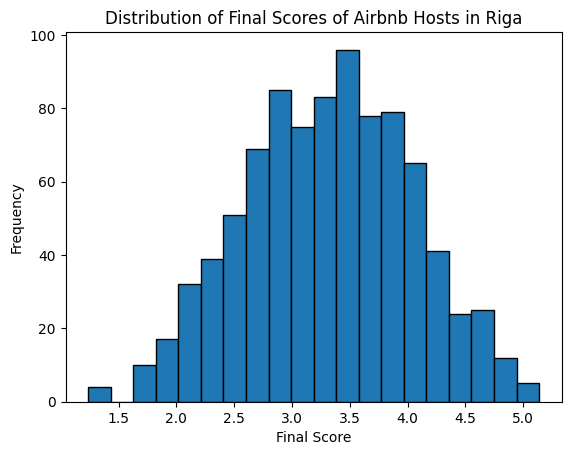

In [42]:
# Create histogram of final_scores
final_scores = result['final score']

plt.hist(final_scores, bins=20, edgecolor='k')  # Du kannst die Anzahl der Bins anpassen

plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores of Airbnb Hosts in Riga')

plt.show()

# Vizualizations

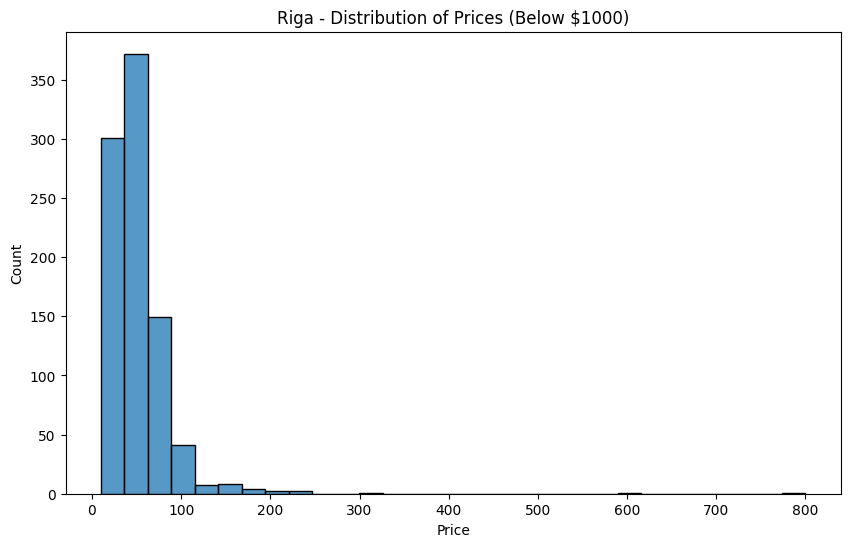

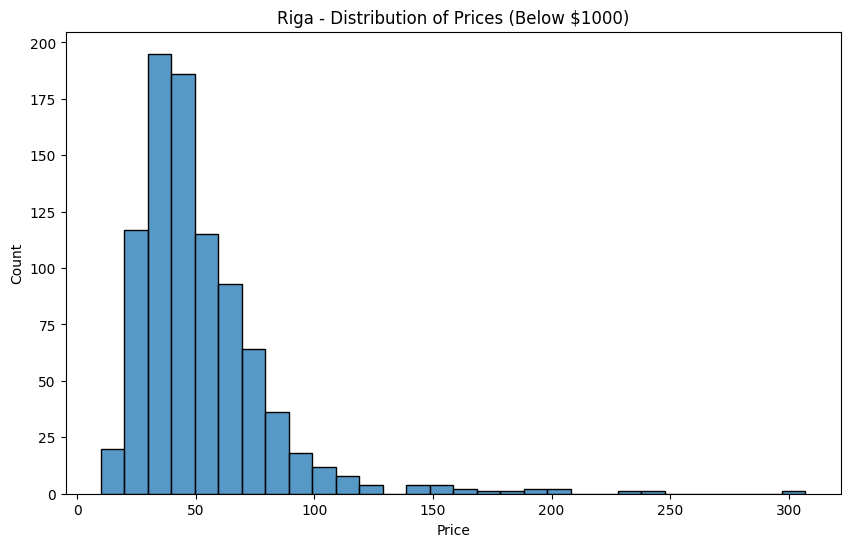

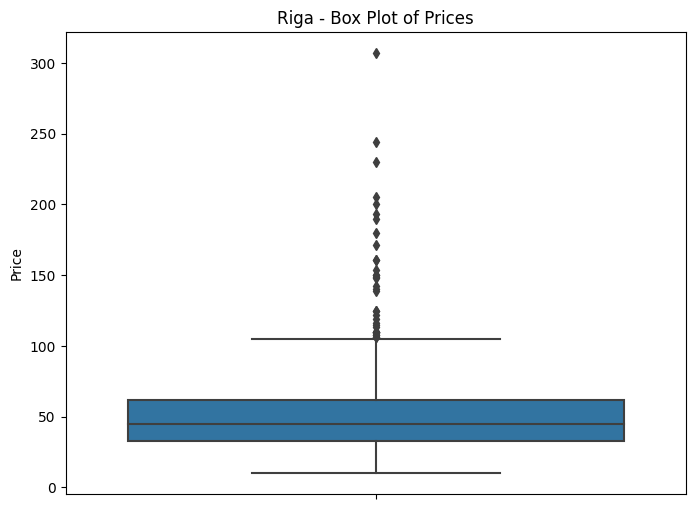

In [47]:
# Histogram (Considering listings with price below $1000):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 1000]['price'], kde=False, bins=30)
plt.title('Riga - Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Histogram (Considering listings with price below $400):
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[filtered_df['price'] < 400]['price'], kde=False, bins=30)
plt.title('Riga - Distribution of Prices (Below $1000)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df[filtered_df['price'] < 400]['price'])
plt.title('Riga - Box Plot of Prices')
plt.ylabel('Price')
plt.show()

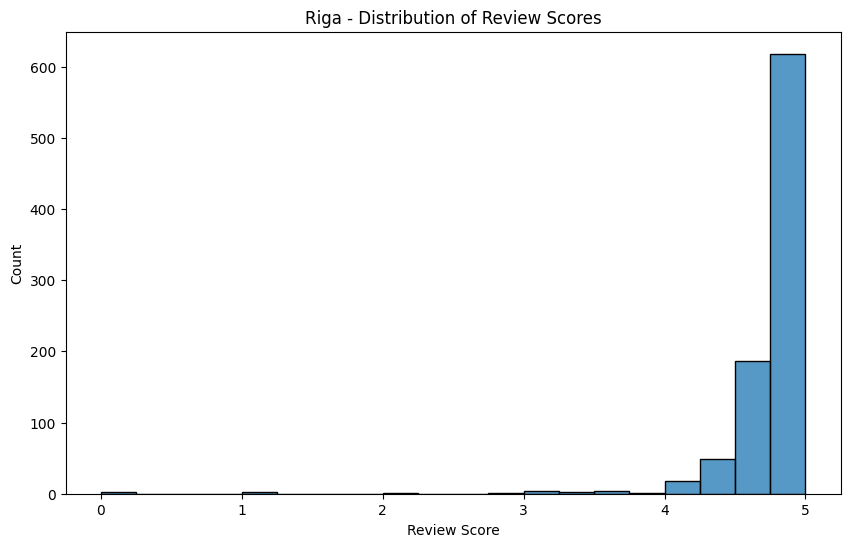

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['review_scores_rating'], kde=False, bins=20)
plt.title('Riga - Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

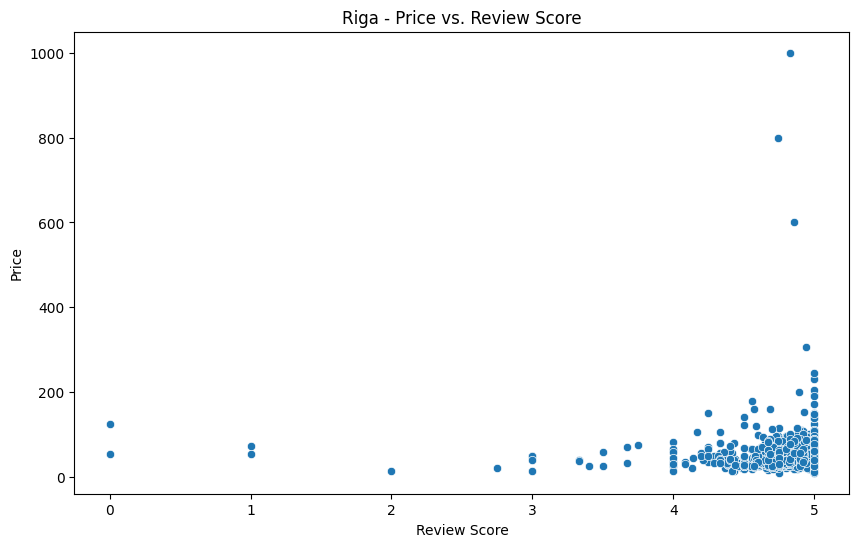

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['review_scores_rating'], y=filtered_df['price'])
plt.title('Riga - Price vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.show()

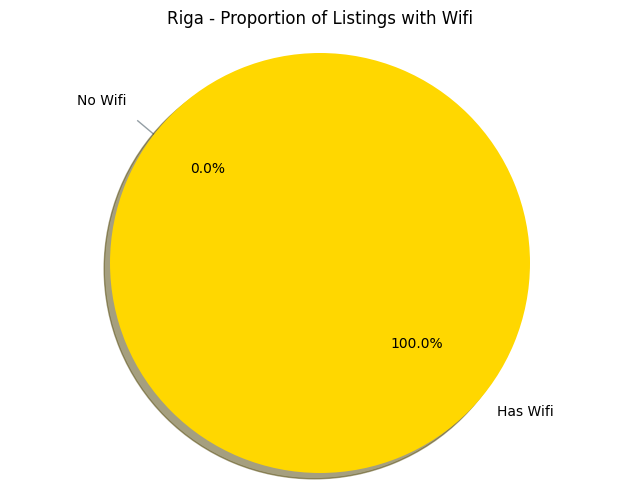

In [50]:
# Check for presence of 'Wifi' or 'wifi' in 'amenities' column
wifi_present = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x).sum()
wifi_not_present = len(filtered_df) - wifi_present

# Plotting listings with wifi
labels = 'Has Wifi', 'No Wifi'
sizes = [wifi_present, wifi_not_present]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Riga - Proportion of Listings with Wifi')
plt.show()

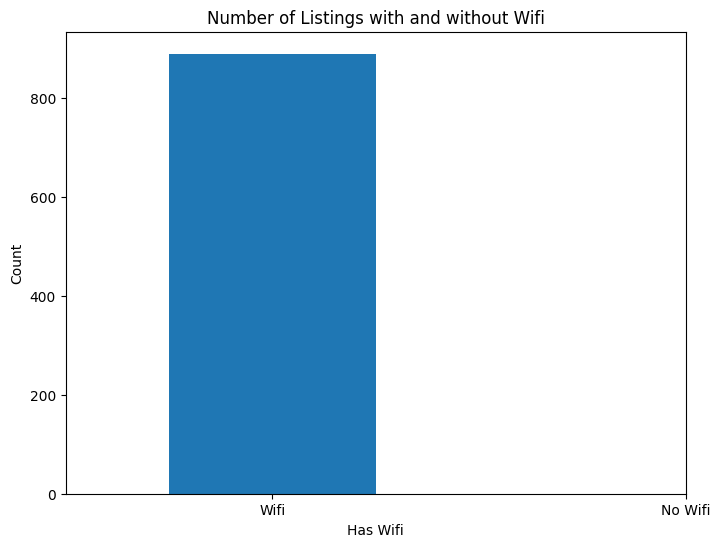

In [51]:
has_wifi = filtered_df['amenities'].apply(lambda x: 'Wifi' in x or 'wifi' in x)
wifi_counts = has_wifi.value_counts()

plt.figure(figsize=(8, 6))
wifi_counts.plot(kind='bar')
plt.title('Riga - Number of Listings with and without Wifi')
plt.xlabel('Has Wifi')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wifi', 'No Wifi'], rotation=0)
plt.show()

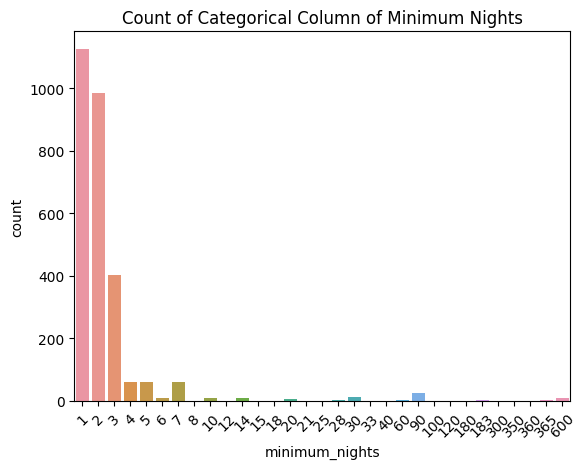

In [52]:
# Bar plot of a categorical column
sns.countplot(data=df, x='minimum_nights')
plt.title('Riga - Count of Categorical Column of Minimum Nights')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Create map of listings in Riga
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=13)

for idx, row in filtered_df.iterrows():
    color = 'green'
    if row['review_scores_rating'] < 80:
        color = 'red'
    elif row['review_scores_rating'] < 90:
        color = 'blue'

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

m.save('riga_map.html')

HTML(filename='riga_map.html')

In [54]:
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Fügen Sie jeden Eintrag zur Karte hinzu
for idx, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
    ).add_to(m)

m.save('map.html')

In [55]:
# Upload neighbourhoods.geojson from files filder in Colab
uploadedGeo = files.upload()
ngeo = gpd.read_file(next(iter(uploadedGeo)))

Saving neighbourhoods.geojson to neighbourhoods.geojson


In [56]:
# Create map of neighbourhoods
m = folium.Map(location=[56.9474944, 24.1067861], zoom_start=11, tiles='cartodb positron')

# Add polygons for neighbourhood groups
dissolved_neighbourhoods = ngeo.dissolve(by='neighbourhood_group')
for idx, row in dissolved_neighbourhoods.iterrows():
    GeoJson(
        row['geometry'],
        name=idx,
        style_function=lambda feature: {
            'fillColor': 'grey',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.3,
        }
    ).add_to(m)

# Speichern der Karte in einer HTML-Datei
map_path = 'riga_neighbourhoods_map.html'
m.save(map_path)
map_path

'riga_neighbourhoods_map.html'